In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

Using TensorFlow backend.
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [ ]:
China_df.columns

In [87]:
def make_df(DataFrame) : 
    df = pd.DataFrame()

    df['Confirm'] = (DataFrame['Daily_confirmed'] + DataFrame['Daily_deaths']) / DataFrame['Total_confirmed']
    df['Flight'] = DataFrame['Passenger_arrivals'] / DataFrame['Flight_arrivals']
    df['Ship'] = ( DataFrame['Ship_crew(korea)'] + DataFrame['Ship_crew(foreign)'] + DataFrame['Ship_passenger'] ) / DataFrame['Ship_count']
    df['News'] = DataFrame['News_Negative'] / DataFrame['News_Sum']
    df['Date'] = DataFrame['Date'].astype(int)

    df.fillna(0, inplace = True)
    df.set_index('Date',inplace=True)
    
    

    df = df.loc[20200101:20200505]
    
    Flight_df = pd.DataFrame(df['Flight'])
    Flight_df.columns = ['Flight']

    Ship_df = pd.DataFrame(df['Ship'])
    Ship_df.columns = ['Ship']

    Confirm_df = pd.DataFrame(df['Confirm'])
    Confirm_df.columns = ['Confirm']

    News_df = pd.DataFrame(df['News'])
    News_df.columns = ['News']
    
    return Flight_df, Ship_df, Confirm_df, News_df

In [88]:
def make_x_train_test(DataFrame) : 
    
    shift_size = 7
    
    y_test = np.asarray(DataFrame[name][shift_size:-1])[-7:]
    df = DataFrame[:-7]
    
    for s in range(1, shift_size+1):
        df['shift_{}'.format(s)] = df[name].shift(s)
          
    y_train = np.asarray(df[name][shift_size:-1])[:-7]
    
    df.drop( name, axis=1, inplace=True)
    
    X_train = np.array(df[shift_size:-1])[:-7]
    X_test = np.array(df[-1:])[-7:]

    X_train_r = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    X_test_r = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
      
    return X_train_r, X_test_r, y_train, y_test

In [89]:
China_df = pd.read_csv('../data/Concat/China_concat.csv', header=0)
Asia_df = pd.read_csv('../data/Concat/Asia_concat.csv', header=0)
America_df = pd.read_csv('../data/Concat/America_concat.csv', header=0)
Africa_df = pd.read_csv('../data/Concat/Africa_concat.csv', header=0)
Europe_df = pd.read_csv('../data/Concat/Europe_concat.csv', header=0)
Oceania_df = pd.read_csv('../data/Concat/Oceania_concat.csv', header=0)

In [90]:
China_test = pd.read_csv('../data/Test/China_test_data.csv', header=0)
Asia_test = pd.read_csv('../data/Test/Asia_test_data.csv', header=0)
America_test = pd.read_csv('../data/Test/America_test_data.csv', header=0)
Africa_test = pd.read_csv('../data/Test/Africa_test_data.csv', header=0)
Europe_test = pd.read_csv('../data/Test/Europe_test_data.csv', header=0)
Oceania_test = pd.read_csv('../data/Test/Oceania_test_data.csv', header=0)

In [143]:
name = 'Flight'

Flight_df, Ship_df, Confirm_df, News_df = make_df(Asia_df)

df = Flight_df

sc = MinMaxScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=[name])

X_train, X_test, y_train, y_test = make_x_train_test(df)
y_hat = abs( np.array(Asia_test[name]) )

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


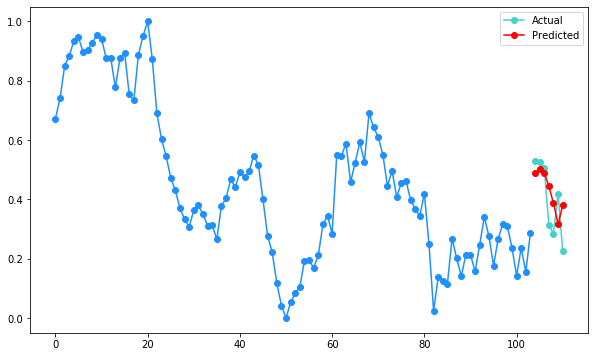

In [144]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(104,), 'o-', color='dodgerblue')
plt.plot(b_axis, y_test.reshape(7,), 'o-', color='mediumturquoise', label='Actual')
plt.plot(b_axis, y_hat.reshape(7,), 'o-', color='red', label='Predicted')
plt.legend()
plt.show()

In [93]:
print(y_test)

[0.03252158 0.03328363 0.03343622 0.03583413 0.03656565 0.03366818
 0.03393965]


In [71]:
print(y_hat)

[0.04877223 0.06018226 0.06587315 0.07068551 0.0608587  0.05606272
 0.03494135]
